# Machine Learning Nanodegree

Hello Kagglers this notebook is part of my Capstone Project for Udacity ML Engineer Nanodegree Program. You can check my [repository](https://github.com/sid321axn/Udacity-MLND-Capstone-Gold-Price-Prediction) for full documentation about the project.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


## About Data

In [2]:
df_final = pd.read_csv("maindatadonedelindicator.csv",na_values=['null'],#index_col=' ',
                       parse_dates=True,infer_datetime_format=True)

C:\Users\Nattapong\AppData\Local\Temp\ipykernel_16592\670163012.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_final = pd.read_csv("maindatadonedelindicator.csv",na_values=['null'],#index_col=' ',


In [3]:
df_final = df_final.drop(["Date","Date.1"],axis=1)


In [4]:
#create a second data frame to predcit seocnd value 
df2 = df_final
df2['Next Close'] =  df2['Close'].shift(-1)
df_final = df2[:-1]
print(df_final['Close'])
print(df_final['Next Close'])


0       1711.739990
1       1712.750000
2       1714.650024
3       1703.030029
4       1689.280029
           ...     
1323    1508.869995
1324    1490.459961
1325    1490.510010
1326    1496.890015
1327    1496.959961
Name: Close, Length: 1328, dtype: float64
0       1712.750000
1       1714.650024
2       1703.030029
3       1689.280029
4       1687.050049
           ...     
1323    1490.459961
1324    1490.510010
1325    1496.890015
1326    1496.959961
1327    1491.140015
Name: Next Close, Length: 1328, dtype: float64


In [5]:
df_final.shape

(1328, 48)

In [6]:
df_final.describe()

,Local_Institutes_buy,Local_Institutes_sell,Local_Institutes_net,Proprietary_Trading_buy,Proprietary_Trading_sell,Proprietary_Trading_net,Foreign_Investors_buy,Foreign_Investors_sell,Foreign_Investors_net,Local Investors,...,ichimoku_conversion_line,parabolic_sar,EMA_10,EMA_20,EMA_50,EMA_100,bb_bbm,bb_bbh,bb_bbl,Next Close
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,...,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,6048.235267,5969.845695,78.389571,6984.403390,6967.036446,17.366943,27095.277796,27513.249656,-417.971860,25753.436569,...,1574.978399,1585.633918,1587.065354,1587.800811,1589.672274,1592.039948,1563.431888,1609.910654,1516.953121,1586.177093
std,2304.033386,2242.886560,2299.733665,2266.060012,2277.442186,874.027959,10595.753458,10152.549536,2511.697523,10715.620556,...,186.913325,143.764096,140.471603,138.208086,132.436206,124.781258,234.167858,231.963986,241.180537,142.505887
min,1736.750000,2007.679872,-16545.904210,2365.397252,2257.534999,-7201.157875,6674.767973,6312.106295,-11945.649750,6583.561257,...,0.000000,969.080017,1096.159386,1149.459989,1255.409534,1285.484888,0.000000,0.000000,0.000000,1024.459961
25%,4481.983253,4447.305404,-1211.963401,5434.234562,5387.036901,-366.855531,19558.108383,20503.829033,-1835.810691,17943.939012,...,1545.666275,1547.209121,1553.239442,1559.208295,1559.678638,1553.708881,1550.524248,1594.255434,1511.473322,1548.580017
50%,5622.642936,5577.999902,82.949461,6687.019864,6643.601789,61.939263,25883.380010,26267.508800,-600.305698,23202.720805,...,1620.072479,1612.343327,1622.782789,1622.425910,1621.461984,1624.385960,1622.380749,1653.942292,1581.776074,1620.904968
75%,7074.226757,7077.498836,1268.499813,8401.837023,8331.803594,465.159819,32427.580883,32652.066240,881.692861,31409.081647,...,1662.006256,1670.910696,1665.030947,1666.927838,1666.068451,1662.093194,1663.117366,1702.253867,1620.487850,1669.210022
max,23331.871670,21929.516690,11481.772090,21423.101800,22457.802520,7284.142412,168421.319000,155886.370400,18958.372660,74035.709080,...,1827.099976,1852.510010,1825.012760,1810.796563,1795.240361,1775.832865,1817.522992,1856.484825,1789.391510,1838.959961


# Checking Missing Values

In [7]:
df_final.isnull().values.any()

False

That's great ! we dont have any missing values in our dataset

## Effect of Index prices on gold rates

In [8]:
adj_close = df_final['Next Close']

In [9]:
test = df_final
target_adj_close = pd.DataFrame(df_final['Next Close'])

In [10]:
df_final.columns

Index(['Local_Institutes_buy', 'Local_Institutes_sell', 'Local_Institutes_net',
       'Proprietary_Trading_buy', 'Proprietary_Trading_sell',
       'Proprietary_Trading_net', 'Foreign_Investors_buy',
       'Foreign_Investors_sell', 'Foreign_Investors_net', 'Local Investors',
       'Unnamed: 11', 'Unnamed: 12', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Gold_Open', 'Gold_High', 'Gold_Low',
       'Gold_Close', 'Gold_Adjclose', 'Gold_Volume', 'Dji_Open', 'Dji_High',
       'Dji_Low', 'Dji_Close', 'Dji_Adjclose', 'Dji_Volume', 'ADX',
       'Aroon_Oscillator', 'Stoch_Oscillator', 'MACD', 'RSI', 'ichimoku_a',
       'ichimoku_b', 'ichimoku_base_line', 'ichimoku_conversion_line',
       'parabolic_sar', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'bb_bbm',
       'bb_bbh', 'bb_bbl', 'Next Close'],
      dtype='object')

In this step I would segregate feature and target variables. I will not use Close feature of GLD ETF and will use Adjusted Close of Gold ETF as target variable 

In [11]:
"""feature_columns = [ 'Local_Institutes_buy', 'Local_Institutes_sell',
       'Local_Institutes_net', 'Proprietary_Trading_buy',
       'Proprietary_Trading_sell', 'Proprietary_Trading_net',
       'Foreign_Investors_buy', 'Foreign_Investors_sell',
       'Foreign_Investors_net', 'Local Investors', 'Unnamed: 11',
       'Unnamed: 12', 'Open', 'High', 'Low', 'Adj Close', 'Volume',
       'Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_Adjclose',
       'Gold_Volume', 'Dji_Open', 'Dji_High', 'Dji_Low', 'Dji_Close',
       'Dji_Adjclose', 'Dji_Volume', 'ADX', 'Aroon_Oscillator',
       'Stoch_Oscillator', 'MACD', 'RSI', 'ichimoku_a', 'ichimoku_b',
       'ichimoku_base_line', 'ichimoku_conversion_line', 'parabolic_sar',
       'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'bb_bbm', 'bb_bbh', 'bb_bbl']"""

"feature_columns = [ 'Local_Institutes_buy', 'Local_Institutes_sell',\n       'Local_Institutes_net', 'Proprietary_Trading_buy',\n       'Proprietary_Trading_sell', 'Proprietary_Trading_net',\n       'Foreign_Investors_buy', 'Foreign_Investors_sell',\n       'Foreign_Investors_net', 'Local Investors', 'Unnamed: 11',\n       'Unnamed: 12', 'Open', 'High', 'Low', 'Adj Close', 'Volume',\n       'Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_Adjclose',\n       'Gold_Volume', 'Dji_Open', 'Dji_High', 'Dji_Low', 'Dji_Close',\n       'Dji_Adjclose', 'Dji_Volume', 'ADX', 'Aroon_Oscillator',\n       'Stoch_Oscillator', 'MACD', 'RSI', 'ichimoku_a', 'ichimoku_b',\n       'ichimoku_base_line', 'ichimoku_conversion_line', 'parabolic_sar',\n       'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'bb_bbm', 'bb_bbh', 'bb_bbl']"

In [12]:
feature_columns = ['Local_Institutes_sell','Proprietary_Trading_sell','Foreign_Investors_net', 'Unnamed: 11', 'Open' , 'Low' , 'Volume' , 'Gold_Low' ,'Gold_Open','Gold_Volume','Dji_Open','Dji_Volume','Aroon_Oscillator','Stoch_Oscillator' ]

In [13]:
"""feature_columns = ['Local_Institutes_sell','Proprietary_Trading_sell','Foreign_Investors_net', 'Unnamed: 11', 'Open' , 'Low' , 'Close' , 'Volume' ,'Gold_Open','Gold_Volume','Dji_Open','Dji_Volume']"""

"feature_columns = ['Local_Institutes_sell','Proprietary_Trading_sell','Foreign_Investors_net', 'Unnamed: 11', 'Open' , 'Low' , 'Close' , 'Volume' ,'Gold_Open','Gold_Volume','Dji_Open','Dji_Volume']"

## Normalizing the data

In this step I would perform feature scaling/normalization of feature variables using sklearn's MinMaxScaler function.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Local_Institutes_sell,Proprietary_Trading_sell,Foreign_Investors_net,Unnamed: 11,Open,Low,Volume,Gold_Low,Gold_Open,Gold_Volume,Dji_Open,Dji_Volume,Aroon_Oscillator,Stoch_Oscillator
0,0.216279,0.184212,0.377767,0.222822,0.832228,0.843430,0.352426,0.122468,0.108814,0.000370,0.108814,0.000370,0.5,0.0
1,0.243316,0.193547,0.394881,0.267595,0.847900,0.861562,0.372751,0.124061,0.117674,0.000032,0.117674,0.000032,0.5,0.0
2,0.290884,0.201593,0.404208,0.283455,0.845553,0.859844,0.401192,0.128955,0.116652,0.000043,0.116652,0.000043,0.5,0.0
3,0.219338,0.220177,0.330518,0.222231,0.850007,0.850941,0.346486,0.134646,0.120968,0.000052,0.120968,0.000052,0.5,0.0
4,0.174499,0.174688,0.298293,0.280691,0.831929,0.835421,0.374084,0.126337,0.125284,0.000029,0.125284,0.000029,0.5,0.0


## split 1000 300 

In [15]:
#963 770  193
#365 
X_train1 = feature_minmax_transform[:770]
y_train1 = target_adj_close[:770]
X_test1 = feature_minmax_transform[770:963]
y_test1 = target_adj_close[770:963]

X_train2 = feature_minmax_transform[328:1135]
y_train2 = target_adj_close[328:1135]
X_test2 = feature_minmax_transform[1135:1328]
y_test2 = target_adj_close[1135:1328]

In [16]:
print(X_train1.shape)
print(X_train2.shape)
print(X_test1.shape)
print(X_test2.shape)
print(y_train1.shape)
print(y_train2.shape)
print(y_test1.shape)
print(y_test2.shape)

(770, 14)
(807, 14)
(193, 14)
(193, 14)
(770, 1)
(807, 1)
(193, 1)
(193, 1)


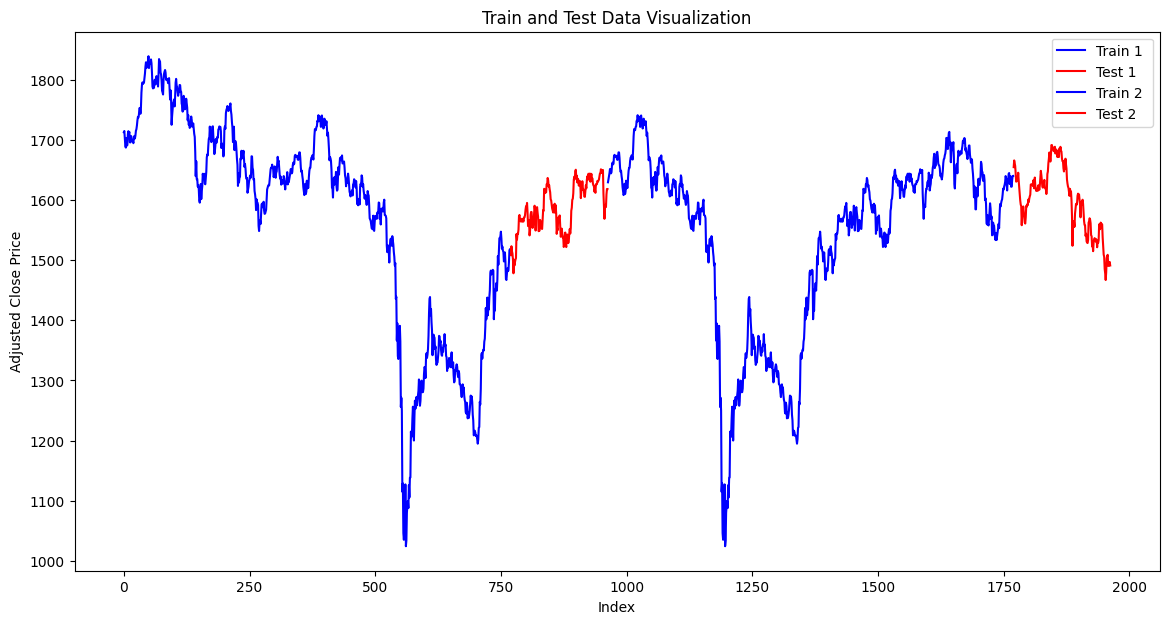

In [17]:
plt.figure(figsize=(14, 7))

# Train data
plt.plot(y_train1, label='Train 1', color='blue')

# Test data
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), y_test1, label='Test 1', color='red')
plt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')

plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)), y_test2, label='Test 2', color='red')
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.title('Train and Test Data Visualization')
plt.legend()
plt.show()

In [18]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [19]:
def validate_result1(model, model_name):
    predictedfirst = model.predict(X_test1)
   # Calculate MSE
    MSE_score = mean_squared_error(y_test1, predictedfirst)
    print('MSE: ', MSE_score)
    

    y_test_np = y_test1.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
    predicted_np = np.array(predictedfirst)
    # Calculate MAPE
    MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
    print('MAPE: ', MAPE_score, '%')

    plt.plot(y_test1.index, predictedfirst,'r', label='Predict')
    plt.plot(y_test1.index, y_test1,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()   
    return MSE_score,MAPE_score

In [20]:
def validate_resulttrain1(model, model_name):
    predictedfirst = model.predict(X_train1)
   # Calculate MSE
    MSE_score = mean_squared_error(y_train1, predictedfirst)
    print('MSE: ', MSE_score)
    

    y_test_np = y_train1.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
    predicted_np = np.array(predictedfirst)
    # Calculate MAPE
    MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
    print('MAPE: ', MAPE_score, '%')    

    plt.plot(y_train1.index, predictedfirst,'r', label='Predict')
    plt.plot(y_train1.index, y_train1,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()
    return MSE_score,MAPE_score

In [21]:
def validate_result2(model, model_name):
    predictedfirst = model.predict(X_test2)
   # Calculate MSE
    MSE_score = mean_squared_error(y_test2, predictedfirst)
    print('MSE: ', MSE_score)
    

    y_test_np = y_test2.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
    predicted_np = np.array(predictedfirst)
    # Calculate MAPE
    MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
    print('MAPE: ', MAPE_score, '%')

    plt.plot(y_test2.index, predictedfirst,'r', label='Predict')
    plt.plot(y_test2.index, y_test2,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()
    return MSE_score,MAPE_score

In [22]:
def validate_resulttrain2(model, model_name):
    predictedfirst = model.predict(X_train2)
   # Calculate MSE
    MSE_score = mean_squared_error(y_train2, predictedfirst)
    print('MSE: ', MSE_score)
    

    y_test_np = y_train2.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
    predicted_np = np.array(predictedfirst)
    # Calculate MAPE
    MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
    print('MAPE: ', MAPE_score, '%')

    plt.plot(y_train2.index, predictedfirst,'r', label='Predict')
    plt.plot(y_train2.index, y_train2,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()
    return MSE_score,MAPE_score

## Model Building

### 1. Benchmark Model :
       I will use Decision Tree Regressor with default parameter as my Benchmark model for the project.

MSE:  609.4063634718681
MAPE:  3.1240544732050446 %


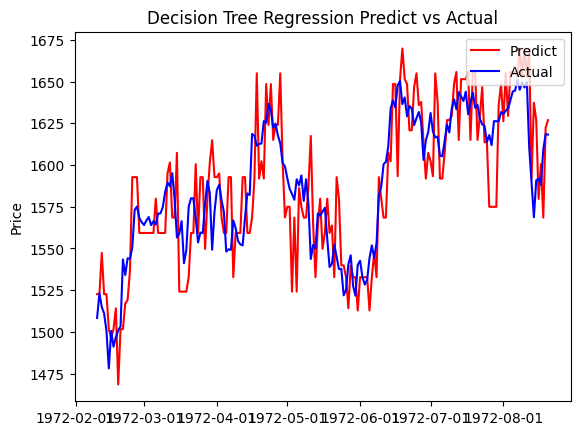

609.4063634718681
3.1240544732050446
MSE:  0.0
MAPE:  13.254675564702383 %


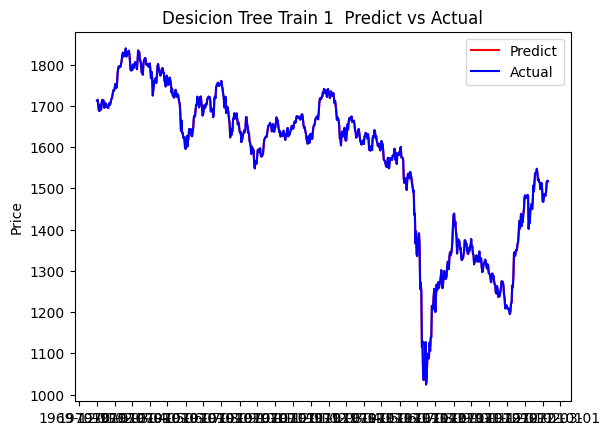

0.0
13.254675564702383


In [23]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train1, y_train1)

dtmsetest1 , dtmapetest1 = validate_result1(benchmark_dt, 'Decision Tree Regression')
print(dtmsetest1)
print(dtmapetest1)
dtmsetrain1 , dtmapetrain1= validate_resulttrain1(benchmark_dt,'Desicion Tree Train 1 ')
print(dtmsetrain1)
print(dtmapetrain1)

dtpredictfirst = benchmark_dt.predict(X_test1)

MSE:  453.1219114559275
MAPE:  4.074128728930366 %


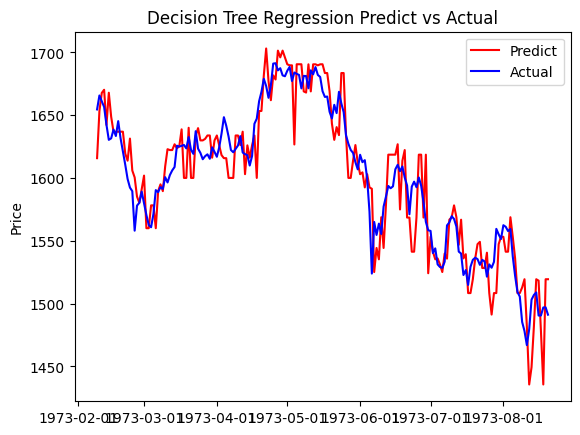

453.1219114559275
4.074128728930366
MSE:  0.0
MAPE:  10.88638075505338 %


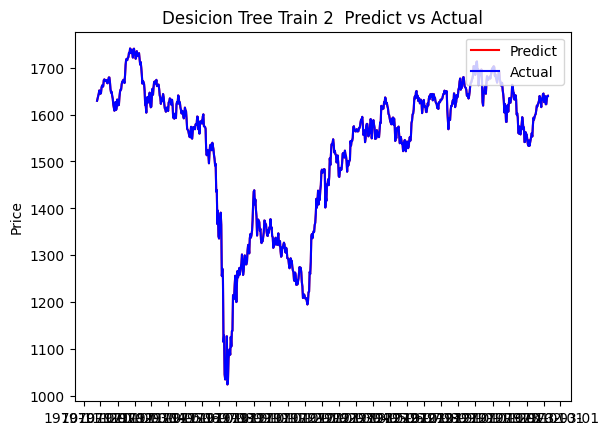

0.0
10.88638075505338


In [24]:

benchmark_dt=dt.fit(X_train2, y_train2)

dtmsetest2 , dtmapetest2 = validate_result2(benchmark_dt, 'Decision Tree Regression')
print(dtmsetest2)
print(dtmapetest2)
dtmsetrain2 , dtmapetrain2 = validate_resulttrain2(benchmark_dt,'Desicion Tree Train 2 ')

print(dtmsetrain2)
print(dtmapetrain2)
dtpredictsecond = benchmark_dt.predict(X_test2)

In [25]:
"""plt.figure(figsize=(14, 7))

# Train data
plt.plot(y_train1, label='Train 1', color='blue')

# Test data
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), , label='Test 1', color='red')
plt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')

plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)), dtpredictedsecond, label='Test 2', color='red')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('decision tree')
plt.legend()
plt.show()
"""

"plt.figure(figsize=(14, 7))\n\n# Train data\nplt.plot(y_train1, label='Train 1', color='blue')\n\n# Test data\nplt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), , label='Test 1', color='red')\nplt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')\n\nplt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)), dtpredictedsecond, label='Test 2', color='red')\nplt.xlabel('Index')\nplt.ylabel('Close Price')\nplt.title('decision tree')\nplt.legend()\nplt.show()\n"

In [26]:
"""decisiontree_alltest = np.concatenate([dtpredictedfirst,dtpredictedsecond])"""

'decisiontree_alltest = np.concatenate([dtpredictedfirst,dtpredictedsecond])'

In [27]:
print(f"DT mse test1 : {dtmsetest1} mape : {dtmapetest1}")
print(f"DT mse test2 : {dtmsetest2} mape : {dtmapetest2}")
print("-------------------------------")
print(f"DT mse train1 : {dtmsetrain1} mape : {dtmapetrain1}")
print(f"DT mse train2 : {dtmsetrain2} mape : {dtmapetrain2}")
print("-------------------------------")

DT mse test1 : 609.4063634718681 mape : 3.1240544732050446
DT mse test2 : 453.1219114559275 mape : 4.074128728930366
-------------------------------
DT mse train1 : 0.0 mape : 13.254675564702383
DT mse train2 : 0.0 mape : 10.88638075505338
-------------------------------


## Solution Model 

### Support Vector Regressor (SVR)

MSE:  426.2190808505839
MAPE:  2.9501023853632184 %


c:\Users\Nattapong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


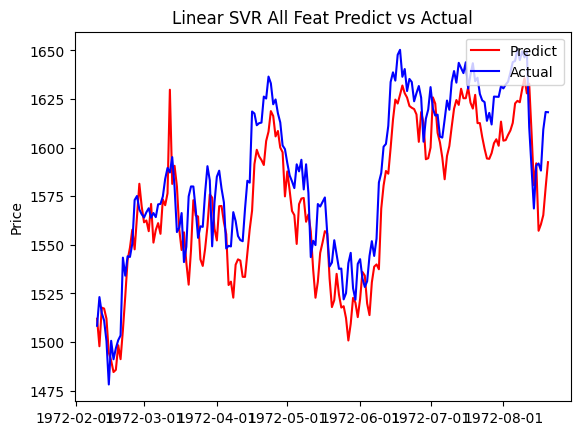

MSE:  337.0484567002722
MAPE:  13.09154194888403 %


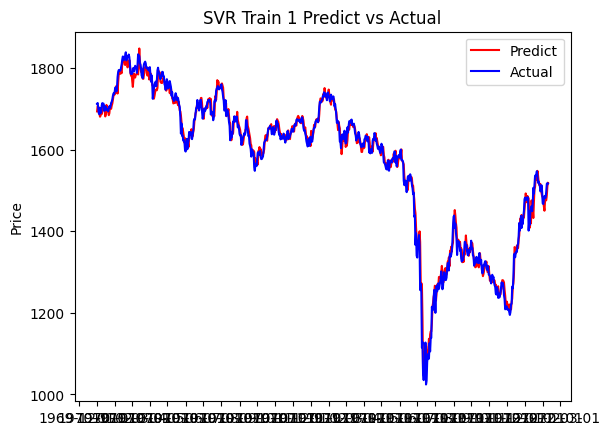

In [28]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear', C=15, epsilon=0.1, gamma='scale')
linear_svr_clf_feat = svr_lin.fit(X_train1,y_train1)
svrmsetest1 ,svrmapetest1 = validate_result1(linear_svr_clf_feat,'Linear SVR All Feat')
svrmsetrain1 , svrmapetrain1 = validate_resulttrain1(linear_svr_clf_feat,'SVR Train 1')


In [29]:
SVRpredictedfirst = linear_svr_clf_feat.predict(X_test1)
SVRmsefirst =  mean_squared_error(y_test1, SVRpredictedfirst)

y_test_np = y_test1.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
predicted_np = np.array(SVRpredictedfirst)
# Calculate MAPE
MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
SVRmapefirst = MAPE_score 

print(SVRmsefirst)
print(SVRmapefirst)

426.2190808505839
2.9501023853632184


MSE:  183.8385945309255
MAPE:  3.8975226764103326 %


c:\Users\Nattapong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


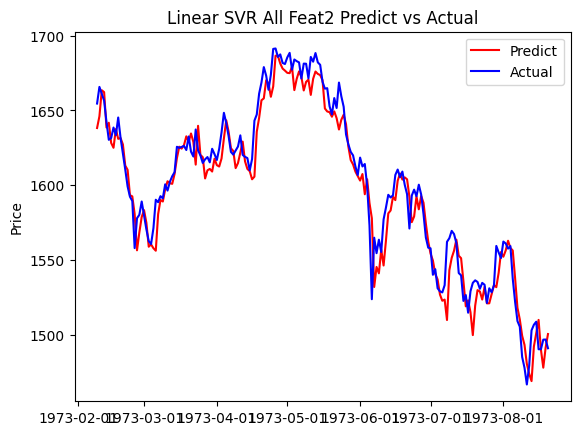

MSE:  303.6854095269932
MAPE:  10.727039832921289 %


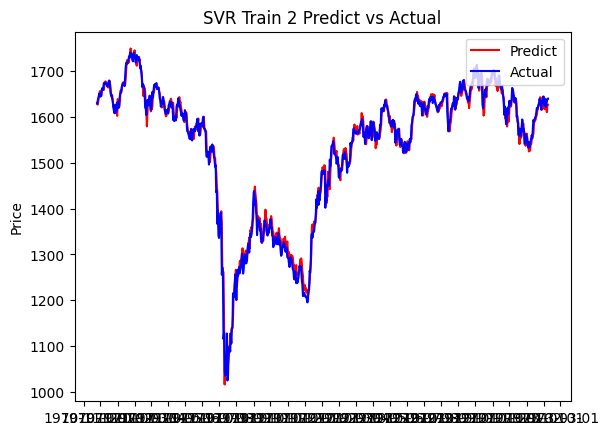

In [30]:
# Save all soultion models
solution_models = {}
linear_svr_clf_feat = svr_lin.fit(X_train2,y_train2)
svrmsetest2 ,svrmapetest2 = validate_result2(linear_svr_clf_feat,'Linear SVR All Feat2')

svrmsetrain2 , svrmapetrain2 = validate_resulttrain2(linear_svr_clf_feat,'SVR Train 2')

In [31]:
SVRpredictedSecond = linear_svr_clf_feat.predict(X_test2)
SVRmseSecond =  mean_squared_error(y_test2, SVRpredictedSecond)

y_test_np = y_test2.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
predicted_np = np.array(SVRpredictedSecond)
# Calculate MAPE
MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
SVRmapeSecond = MAPE_score 

print(SVRmseSecond)
print(SVRmapeSecond)

183.8385945309255
3.8975226764103326


In [32]:

solution_models['SVR'] = linear_svr_clf_feat

In [33]:
print(f"SVR mse test1 : {svrmsetest1} mape : {svrmapetest1}")
print(f"SVR mse test2 : {svrmsetest2} mape : {svrmapetest2}")
print("-------------------------------")
print(f"SVR mse train1 : {svrmsetrain1} mape : {svrmapetrain1}")
print(f"SVR mse train2 : {svrmsetrain2} mape : {svrmapetrain2}")
print("-------------------------------")

SVR mse test1 : 426.2190808505839 mape : 2.9501023853632184
SVR mse test2 : 183.8385945309255 mape : 3.8975226764103326
-------------------------------
SVR mse train1 : 337.0484567002722 mape : 13.09154194888403
SVR mse train2 : 303.6854095269932 mape : 10.727039832921289
-------------------------------


In [34]:
"""plt.figure(figsize=(14, 7))

plt.plot(y_train1, label='Train 1', color='blue')

# Test data
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), SVRpredictedfirst, label='Test 1', color='red')
plt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')
plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),SVRpredictedSecond, label='Test 2', color='red')
SVRallmse = SVRmsefirst + SVRmseSecond
SVRaveragemse = SVRallmse/2

SVRallmape = SVRmapefirst + SVRmapeSecond 
SVRaveragemape = SVRallmape/2

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.title('SVR')
plt.legend()
plt.show()
print(SVRaveragemse)
print(SVRaveragemape , '%')"""

"plt.figure(figsize=(14, 7))\n\nplt.plot(y_train1, label='Train 1', color='blue')\n\n# Test data\nplt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), SVRpredictedfirst, label='Test 1', color='red')\nplt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')\nplt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),SVRpredictedSecond, label='Test 2', color='red')\nSVRallmse = SVRmsefirst + SVRmseSecond\nSVRaveragemse = SVRallmse/2\n\nSVRallmape = SVRmapefirst + SVRmapeSecond \nSVRaveragemape = SVRallmape/2\n\n# Labels and Legend\nplt.xlabel('Index')\nplt.ylabel('Adjusted Close Price')\nplt.title('SVR')\nplt.legend()\nplt.show()\nprint(SVRaveragemse)\nprint(SVRaveragemape , '%')"

In [35]:
SVRalltestdf = np.concatenate([SVRpredictedfirst, SVRpredictedSecond])

## Solution Model : Random Forest

c:\Users\Nattapong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE:  291.9794829879316
MAPE:  3.196214564084881 %


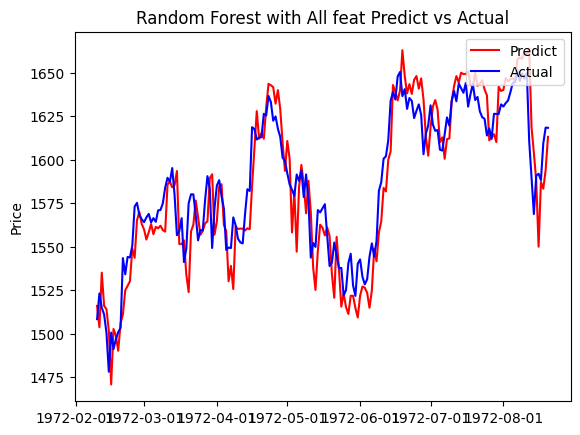

MSE:  44.73614877600545
MAPE:  13.237869828597916 %


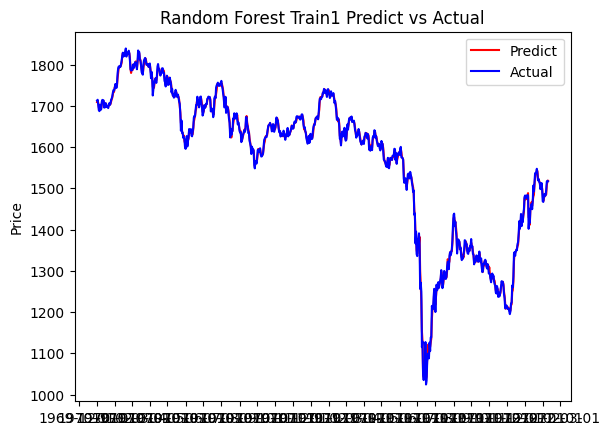

In [36]:

rf_cl = RandomForestRegressor(
    random_state=100,
    n_estimators=100,      # Try increasing this
)
random_forest_clf_feat = rf_cl.fit(X_train1,y_train1)
rfmsetest1, rfmapetest1 = validate_result1(random_forest_clf_feat,'Random Forest with All feat')
rfmsetrain1, rfmapetrain1 = validate_resulttrain1(random_forest_clf_feat,'Random Forest Train1')

In [37]:
RFpredictedfirst = random_forest_clf_feat.predict(X_test1)

RFmsefirst =  mean_squared_error(y_test1, RFpredictedfirst)

y_test_np = y_test1.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
predicted_np = np.array(RFpredictedfirst)
# Calculate MAPE
MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
RFmapefirst = MAPE_score 

print(RFmsefirst)
print(RFmapefirst)


291.9794829879316
3.196214564084881


In [38]:
solution_models['Random_Forest'] = random_forest_clf_feat

MSE:  257.8862428565219
MAPE:  4.108702861988935 %


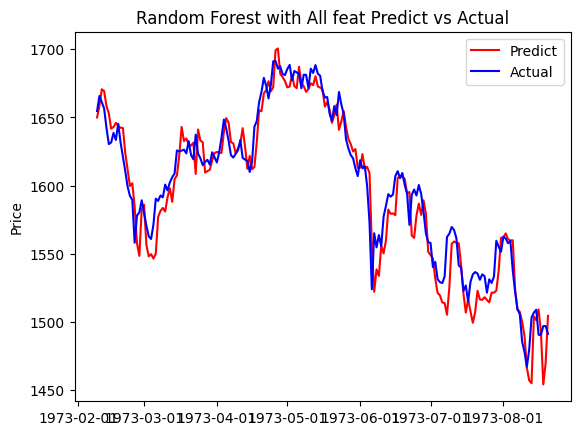

MSE:  159.18778799998105
MAPE:  10.931538406436747 %


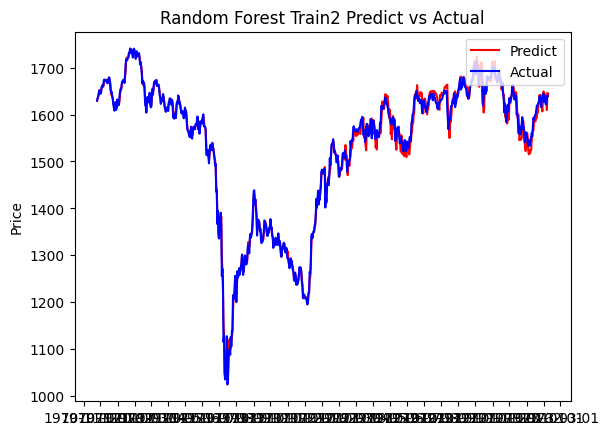

In [39]:
#random_forest_clf_feat = rf_cl.fit(X_train2,y_train2)   
rfmsetest2, rfmapetest2 = validate_result2(random_forest_clf_feat,'Random Forest with All feat')
rfmsetrain2, rfmapetrain2 = validate_resulttrain2(random_forest_clf_feat,'Random Forest Train2')

In [40]:
RFpredictedsecond = random_forest_clf_feat.predict(X_test2)
RFmseSecond =  mean_squared_error(y_test2, RFpredictedsecond)

y_test_np = y_test2.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
# Calculate MAPE
MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
RFmapeSecond = MAPE_score 

print(RFmseSecond)
print(RFmapeSecond)

257.8862428565219
3.7725546769484892


In [41]:
solution_models['Random_Forest'] = random_forest_clf_feat

In [42]:
print(f"RF mse test1 : {rfmsetest1} mape : {svrmapetest1}")
print(f"RF mse test2 : {svrmsetest2} mape : {svrmapetest2}")
print("-------------------------------")
print(f"RF mse train1 : {svrmsetrain1} mape : {svrmapetrain1}")
print(f"RF mse train2 : {svrmsetrain2} mape : {svrmapetrain2}")
print("-------------------------------")

RF mse test1 : 291.9794829879316 mape : 2.9501023853632184
RF mse test2 : 183.8385945309255 mape : 3.8975226764103326
-------------------------------
RF mse train1 : 337.0484567002722 mape : 13.09154194888403
RF mse train2 : 303.6854095269932 mape : 10.727039832921289
-------------------------------


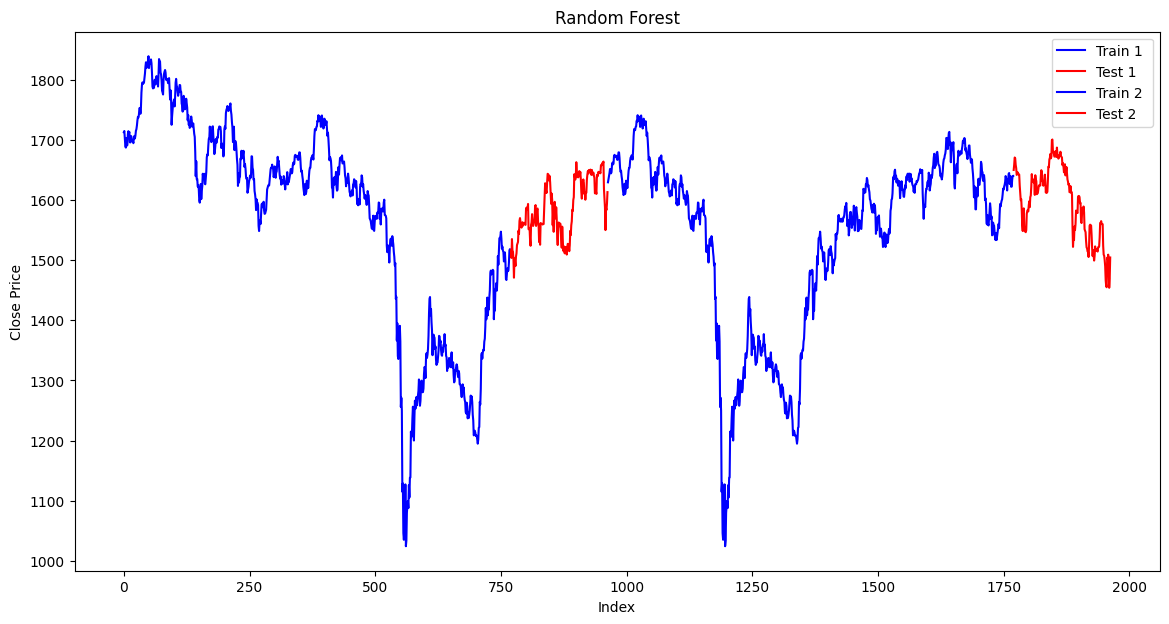

274.9328629222267
3.484384620516685 %


In [43]:
plt.figure(figsize=(14, 7))

plt.plot(y_train1, label='Train 1', color='blue')

# Test data
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), RFpredictedfirst, label='Test 1', color='red')
plt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')
plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),RFpredictedsecond, label='Test 2', color='red')

RFallmse = RFmsefirst + RFmseSecond
RFaveragemse = RFallmse/2

RFallmape = RFmapefirst + RFmapeSecond
RFaveragemape = RFallmape/2

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Random Forest')
plt.legend()
plt.show()
print(RFaveragemse)
print(RFaveragemape , '%')

In [44]:
RFalltestdf = np.concatenate([RFpredictedfirst, RFpredictedsecond])


As we have seen, Random forest with default parameters performed better than tuned Random forest model.So, we will include random forest with default parameters as our second solution model.

In [45]:
print(f"DT mse test1 : {dtmsetest1} mape : {dtmapetest1}")
print(f"DT mse test2 : {dtmsetest2} mape2 : {dtmapetest2}")
print("-------------------------------")
print(f"DT mse train1 : {dtmsetrain1} mape : {dtmapetrain1}")
print(f"DT mse train2 : {dtmsetrain2} mape2 : {dtmapetrain2}")
print("-------------------------------")

DT mse test1 : 609.4063634718681 mape : 3.1240544732050446
DT mse test2 : 453.1219114559275 mape2 : 4.074128728930366
-------------------------------
DT mse train1 : 0.0 mape : 13.254675564702383
DT mse train2 : 0.0 mape2 : 10.88638075505338
-------------------------------


In [46]:
print(f"RF mse test1 : {rfmsetest1} mape : {svrmapetest1}")
print(f"RF mse test2 : {svrmsetest2} mape : {svrmapetest2}")
print("-------------------------------")
print(f"RF mse train1 : {svrmsetrain1} mape : {svrmapetrain1}")
print(f"RF mse train2 : {svrmsetrain2} mape : {svrmapetrain2}")
print("-------------------------------")

RF mse test1 : 291.9794829879316 mape : 2.9501023853632184
RF mse test2 : 183.8385945309255 mape : 3.8975226764103326
-------------------------------
RF mse train1 : 337.0484567002722 mape : 13.09154194888403
RF mse train2 : 303.6854095269932 mape : 10.727039832921289
-------------------------------


In [47]:
print(f"SVR mse test1 : {svrmsetest1} mape : {svrmapetest1}")
print(f"SVR mse test2 : {svrmsetest2} mape : {svrmapetest2}")
print("-------------------------------")
print(f"SVR mse train1 : {svrmsetrain1} mape : {svrmapetrain1}")
print(f"SVR mse train2 : {svrmsetrain2} mape : {svrmapetrain2}")
print("-------------------------------")

SVR mse test1 : 426.2190808505839 mape : 2.9501023853632184
SVR mse test2 : 183.8385945309255 mape : 3.8975226764103326
-------------------------------
SVR mse train1 : 337.0484567002722 mape : 13.09154194888403
SVR mse train2 : 303.6854095269932 mape : 10.727039832921289
-------------------------------


In [48]:
print("lstm mse1 : 143.43843474415505 mse2 : 231.79974748139358")
print("lstm mape1 : 2.93950440550919 mape2 : 3.882432312355509")

lstm mse1 : 143.43843474415505 mse2 : 231.79974748139358
lstm mape1 : 2.93950440550919 mape2 : 3.882432312355509


## Model Review
In this step, we will review benchmark model and all the solution model based on evaluation metrics i.e, RMSE and R2 score

In [49]:
solution_models

{'SVR': SVR(C=15, kernel='linear'),
 'Random_Forest': RandomForestRegressor(random_state=100)}

In [50]:
flstm = pd.read_csv('flstm.csv')
slstm = pd.read_csv('slstm.csv')

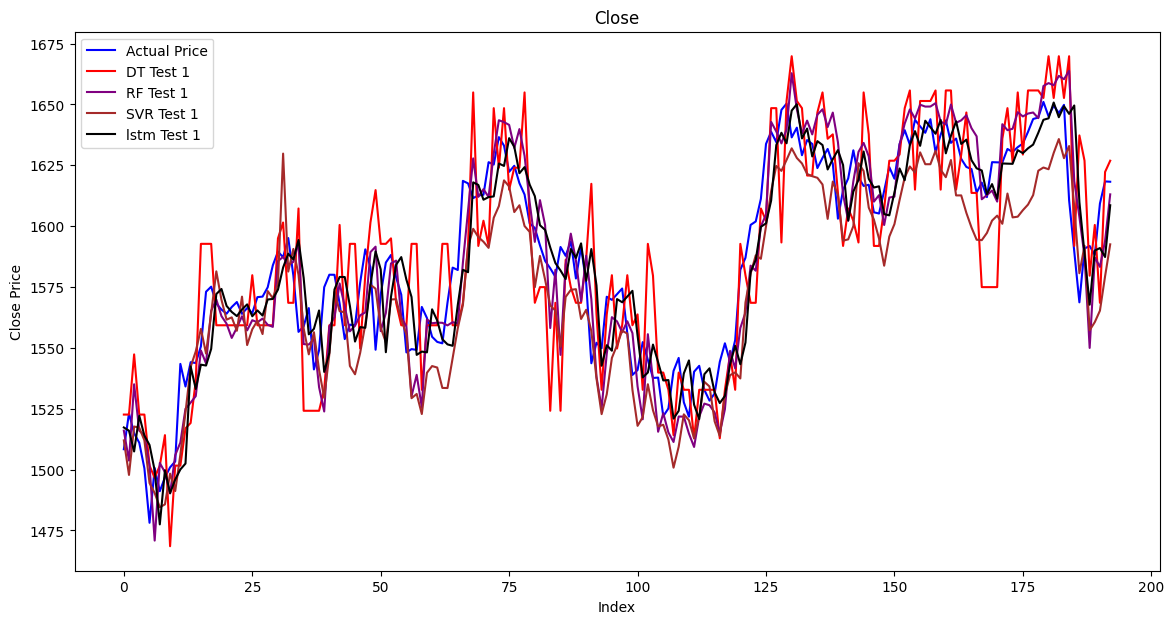

In [51]:
#y test 2 

plt.figure(figsize=(14, 7))

#decisiontree_alltest = DT
#svr = result
plt.plot(range(0,len(y_test1)),y_test1, label='Actual Price', color='blue')
plt.plot(dtpredictfirst, label='DT Test 1', color='red')
plt.plot(RFpredictedfirst, label='RF Test 1', color='purple')
plt.plot(SVRpredictedfirst, label='SVR Test 1', color='brown')
plt.plot(flstm, label='lstm Test 1', color='black')

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close')
plt.legend()
plt.show()
#dt

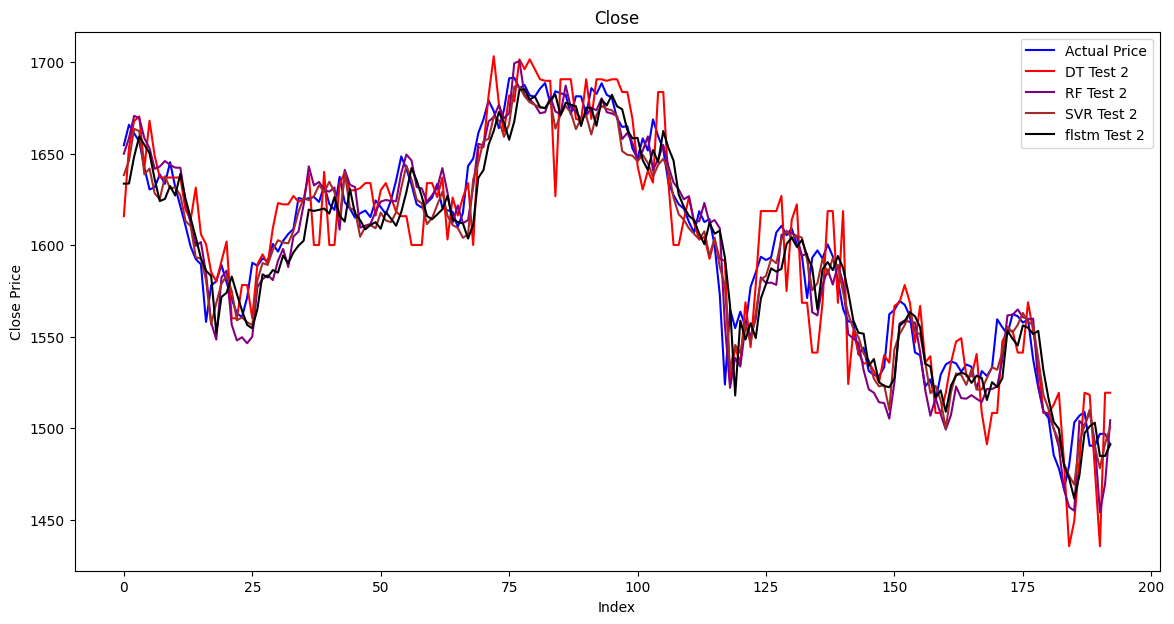

In [52]:
#y test 2 

plt.figure(figsize=(14, 7))

#decisiontree_alltest = DT
#svr = result
plt.plot(range(0,len(y_test2)),y_test2, label='Actual Price', color='blue')
plt.plot(dtpredictsecond, label='DT Test 2', color='red')
plt.plot(RFpredictedsecond, label='RF Test 2', color='purple')
plt.plot(SVRpredictedSecond, label='SVR Test 2', color='brown')
plt.plot(slstm, label='flstm Test 2', color='black')

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close')
plt.legend()
plt.show()
#dt

In [53]:
yalltestdf = pd.concat([y_test1, y_test2], ignore_index=True)

In [54]:
yalltestdf

,Next Close
0,1508.349976
1,1523.109985
2,1514.910034
3,1511.030029
4,1500.510010
...,...
381,1490.459961
382,1490.510010
383,1496.890015
384,1496.959961


KeyError: 'Close'

In [56]:
df = y_test2

In [57]:
df["Decision Tree"] = dtpredictsecond
df["Random Forest"] = RFpredictedsecond
df['SVR'] = SVRpredictedSecond

C:\Users\Nattapong\AppData\Local\Temp\ipykernel_16592\1909847986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Decision Tree"] = dtpredictsecond
C:\Users\Nattapong\AppData\Local\Temp\ipykernel_16592\1909847986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Random Forest"] = RFpredictedsecond
C:\Users\Nattapong\AppData\Local\Temp\ipykernel_16592\1909847986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [58]:
df.to_csv('Nextclose+3model.csv',index = False)

In [ ]:
df

,Next Close,Decision Tree,Random Forest,SVR
1135,1654.619995,1621.949951,1647.397004,1638.527789
1136,1665.739990,1630.390015,1654.629605,1649.648787
1137,1661.089966,1683.599976,1668.429014,1664.711761
1138,1656.579956,1667.750000,1662.977200,1661.950669
1139,1642.329956,1630.390015,1653.477003,1644.989003
...,...,...,...,...
1323,1490.459961,1511.030029,1504.471608,1509.728215
1324,1490.510010,1478.140015,1491.376110,1490.205006
1325,1496.890015,1435.560059,1464.241622,1482.520342
1326,1496.959961,1519.380005,1476.001818,1493.562964


In [ ]:
actualprice = pd.concat([y_train1,y_test1,y_train2,y_test2], ignore_index=True)

In [ ]:
lstmallpredict = pd.read_csv('lstm.csv')
lstmallpredict

,Close
0,1628.0726
1,1628.1508
2,1642.3774
3,1653.1753
4,1648.6626
...,...
188,1497.5513
189,1499.5491
190,1481.4305
191,1481.4800


NameError: name 'dtpredictedfirst' is not defined

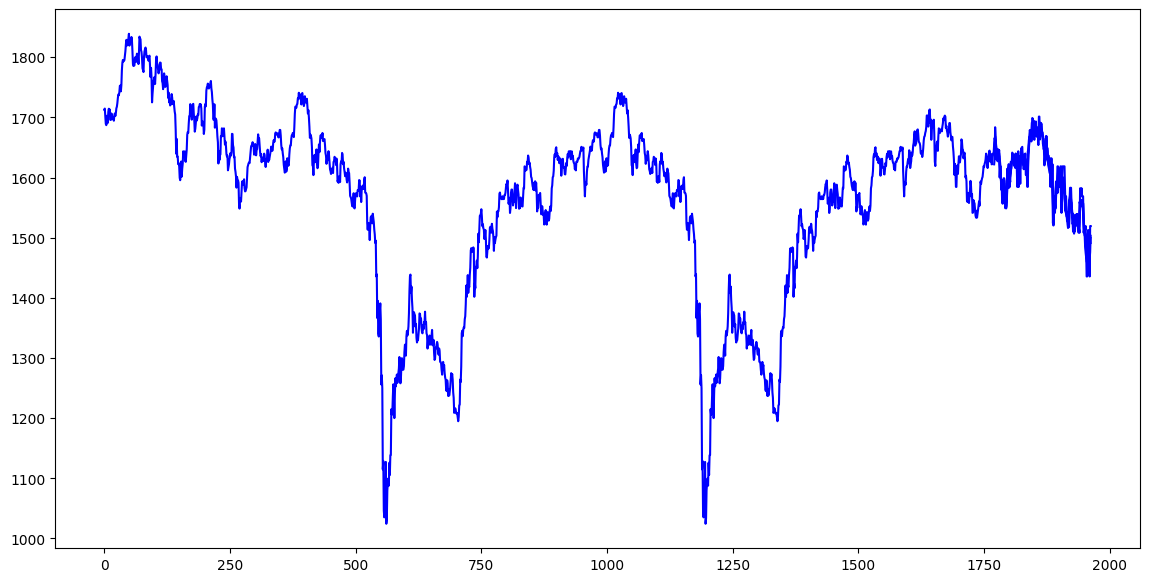

In [ ]:
plt.figure(figsize=(14, 7))

#decisiontree_alltest = DT
#svr = result
plt.plot(actualprice, label='Actual Price', color='blue')
# Test data
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), dtpredictedfirst, label='DT Test 1', color='red')
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), RFpredictedfirst, label='RF Test 1', color='purple')
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), SVRpredictedfirst, label='SVR Test 1', color='brown')
plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),dtpredictedsecond, label='DT Test 2', color='red')
plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),RFpredictedsecond, label='RF Test 2', color='purple')
plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),SVRpredictedSecond, label='SVR Test 2', color='brown')

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close')
plt.legend()
plt.show()
#dt
print('Decision Tree - Mse: ' + str(DTaveragemse) + ', Mape: ' + str(DTaveragemape))
#svr
print('Support Vector regresser - Mse: ' + str(SVRaveragemse) + ', Mape: ' + str(SVRaveragemape))
#rf
print('Random Forest - Mse: ' + str(RFaveragemse) + ', Mape: ' + str(RFaveragemape))

print('Long Short Term memory - Mse: wating, Mape: waiting')

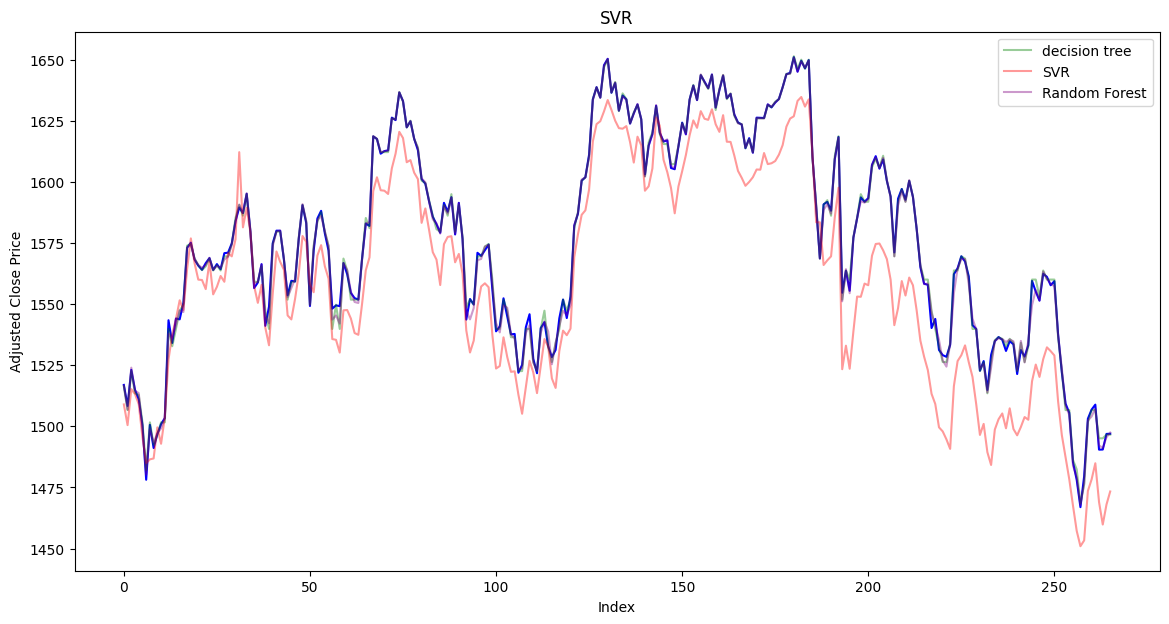

Decision Tree - Mse: 3.685229864757584, Mape: 2.777645715586684
Support Vector regresser - Mse: 618.5212331554784, Mape: 2.949009484956954
Random Forest - Mse: 4.313206080006708, Mape: 3.246897634215399
Long Short Term memory - Mse: waiting, Mape: waiting


In [ ]:
plt.figure(figsize=(14, 7))

plt.plot( yalltestdf,color='blue' )
plt.plot( decisiontree_alltest, label='decision tree', color='green',alpha=0.4)
plt.plot( SVRalltestdf, label='SVR', color='red',alpha=0.4)
plt.plot( RFalltestdf, label='Random Forest', color='purple',alpha=0.4)
#plt.plot( lstmallpredict, label='LSTM', color='pink',alpha=0.4)

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.title('SVR')
plt.legend()
plt.show()

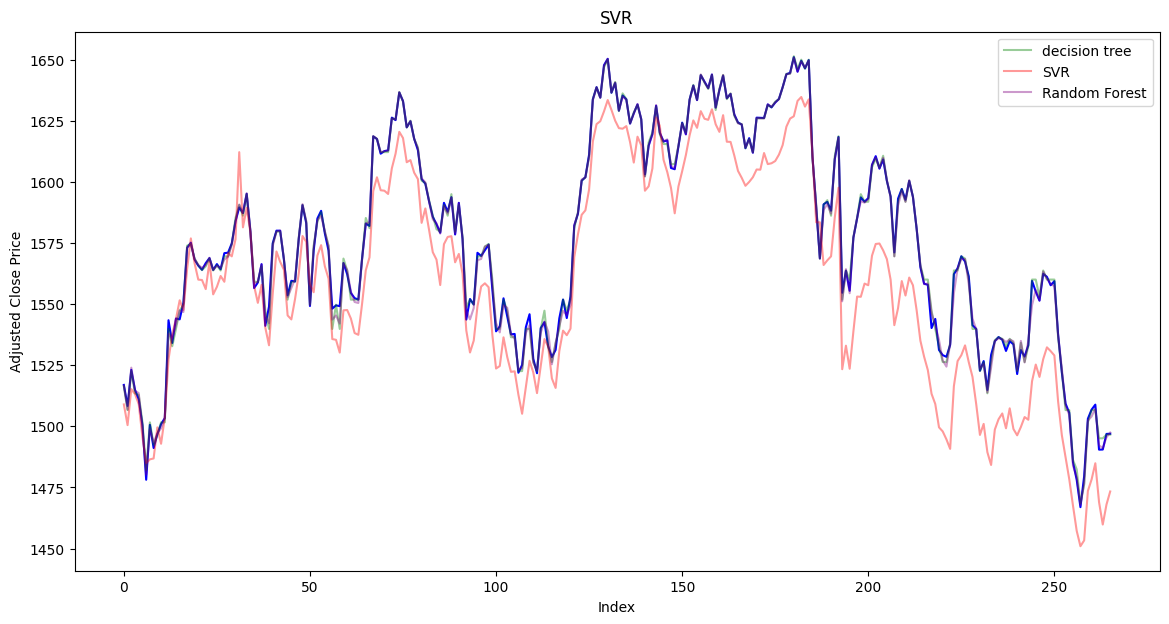

Decision Tree - Mse: 3.685229864757584, Mape: 2.777645715586684
Support Vector regresser - Mse: 618.5212331554784, Mape: 2.949009484956954
Random Forest - Mse: 4.313206080006708, Mape: 3.246897634215399
Long Short Term memory - Mse: waiting, Mape: waiting


In [ ]:
plt.figure(figsize=(14, 7))

plt.plot( yalltestdf,color='blue' )
plt.plot( decisiontree_alltest, label='decision tree', color='green',alpha=0.4)
plt.plot( SVRalltestdf, label='SVR', color='red',alpha=0.4)
plt.plot( RFalltestdf, label='Random Forest', color='purple',alpha=0.4)
#plt.plot( lstmallpredict, label='LSTM', color='pink',alpha=0.4)

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.title('SVR')
plt.legend()
plt.show()
#dt
print('Decision Tree - Mse: ' + str(DTaveragemse) + ', Mape: ' + str(DTaveragemape))
#svr
print('Support Vector regresser - Mse: ' + str(SVRaveragemse) + ', Mape: ' + str(SVRaveragemape))
#rf
print('Random Forest - Mse: ' + str(RFaveragemse) + ', Mape: ' + str(RFaveragemape))

print('Long Short Term memory - Mse: waiting, Mape: waiting')

In [ ]:
DT = pd.DataFrame(decisiontree_alltest, columns=['Close'])

In [ ]:
SVRDF = pd.DataFrame(SVRalltestdf, columns=['Close'])

In [ ]:
RFDF = pd.DataFrame(RFalltestdf, columns=['Close'])

In [ ]:
print(DT.shape)
print(SVRDF.shape)
print(RFDF.shape)

(266, 1)
(266, 1)
(266, 1)


In [ ]:
DT.to_csv('DecisionTree_Close.csv',index = False)
SVRDF.to_csv('SVR_Close.csv',index = False)
RFDF.to_csv('RandomForest_Close.csv',index = False)

In [ ]:
SVRDF

,Close
0,1508.955950
1,1500.493070
2,1515.216164
3,1513.165839
4,1509.081485
...,...
261,1484.885707
262,1468.999712
263,1459.815095
264,1468.006872


In [ ]:
ALLY = pd.DataFrame(yalltestdf, columns=['Close'])

In [ ]:
ALLY.to_csv('Actual.csv',index = False)